In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("/kaggle/input/flight-delays/flights.csv")

In [4]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [5]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(5819079, 31)

In [7]:
data.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [8]:
data.describe(include = 'object')

,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,CANCELLATION_REASON
count,5819079,5804358,5819079,5819079,89884
unique,14,4897,930,930,4
top,WN,N480HA,ATL,ATL,B
freq,1261855,3768,346836,346904,48851


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [10]:
data.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [11]:
data['AIRLINE'].unique()

array(['AS', 'AA', 'US', 'DL', 'NK', 'UA', 'HA', 'B6', 'OO', 'EV', 'MQ',
       'F9', 'WN', 'VX'], dtype=object)

In [12]:
data['TAIL_NUMBER'].unique()

array(['N407AS', 'N3KUAA', 'N171US', ..., 'N7LEAA', 'N850DN', 'N8676A'],
      dtype=object)

In [13]:
data['ORIGIN_AIRPORT'].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'MAF', 'DFW', 'MKE',
       'IAH', 'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'SGF', 'PHL', 'SBN',
       'RDD', 'EUG', 'IAD', 'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT',
       'SMF', 'AUS', 'MCI', 'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA',
       'SAT', 'CHS', 'SBA', 'SMX', 'IND', 'CLE', 'GSP', 'BDL', 'ABI',
       'RIC', 'BFL', 'OMA', 'RDM', 'FLL', 'CID', 'TPA', 'SYR', 'ROC',
       'TYR', 'LAN', 'XNA', 'GSO', 'EWR', 'PBI', 'RSW', 'OAK', 'PVD',
       'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'LGA', 'TUL', 'LIT', 'MSY',
       'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT', 'SAV', 'CLT', 'GRB',
       'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX', 'CWA', 'MSO', 'TTN',
       'AMA', 'CLL', 'HOU', 'JLN', 'MLI', 'RDU', 'CVG', 'MHK', 'MOB',
       'TLH', 'BHM', 'CAE', 'TXK', 'ACY', 'DTW', 'RAP', 'TUS', 'EAU',
       'DLH', 'FSD',

In [14]:
data['DESTINATION_AIRPORT'].unique()

array(['SEA', 'PBI', 'CLT', 'MIA', 'ANC', 'MSP', 'DFW', 'ATL', 'IAH',
       'PDX', 'MCI', 'FLL', 'ORD', 'HNL', 'PHX', 'EWR', 'JFK', 'MCO',
       'BOS', 'BDL', 'ITO', 'SFO', 'KOA', 'OGG', 'MYR', 'DTW', 'LIH',
       'DEN', 'SJU', 'LAX', 'BWI', 'IAD', 'BQN', 'BUF', 'LGA', 'HOU',
       'SLC', 'PHL', 'SJC', 'OAK', 'LGB', 'TPA', 'DCA', 'TTN', 'BTR',
       'LAS', 'RSW', 'BRD', 'STL', 'RKS', 'MBS', 'SNA', 'MEI', 'MDW',
       'SAN', 'RIC', 'AUS', 'OTZ', 'PIT', 'JAX', 'MSY', 'ONT', 'PSP',
       'BUR', 'DAL', 'CVG', 'SMF', 'RDU', 'JMS', 'BNA', 'DSM', 'MAF',
       'BOI', 'ELP', 'TUS', 'SCC', 'HPN', 'STT', 'MDT', 'RHI', 'SBP',
       'MKE', 'JNU', 'CMH', 'CLD', 'KTN', 'CAK', 'CRP', 'CLE', 'GPT',
       'SHV', 'TYS', 'IND', 'LIT', 'SAT', 'SRQ', 'TUL', 'GRK', 'PNS',
       'BTV', 'CHS', 'DAY', 'OKC', 'SAV', 'XNA', 'COS', 'GJT', 'BZN',
       'PUB', 'HRL', 'HDN', 'MEM', 'GEG', 'ORH', 'SYR', 'GSO', 'VPS',
       'LAW', 'ACY', 'LBB', 'JAC', 'BIL', 'EUG', 'ASE', 'TVC', 'MTJ',
       'CAE', 'PVD',

In [15]:
data['CANCELLATION_REASON'].unique()

array([nan, 'A', 'B', 'C', 'D'], dtype=object)

In [16]:
# Columns to check
time_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

# Display sample values from each time column
for col in time_columns:
    print(f"\nSample values for {col}:")
    print(data[col].dropna().sample(10, random_state=1).astype(int).values)


Sample values for SCHEDULED_DEPARTURE:
[1945  820 1507 2204 1325 1950 1130 1412  900  905]

Sample values for DEPARTURE_TIME:
[1525 1732 1820  656  707  959 1518 1022 2046 1524]

Sample values for SCHEDULED_ARRIVAL:
[2124  913 1813 2352 1500 2300 1720 1557 1125 1004]

Sample values for ARRIVAL_TIME:
[1807  750 1616 1747 2116 1343  704 2110 1033  644]


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([5.623798e+06, 1.008930e+05, 6.404000e+03, 1.013000e+03,
        4.860000e+02, 2.110000e+02, 7.600000e+01, 3.400000e+01,
        9.000000e+00, 2.000000e+00]),
 array([ -82.,  125.,  332.,  539.,  746.,  953., 1160., 1367., 1574.,
        1781., 1988.]),
 <BarContainer object of 10 artists>)

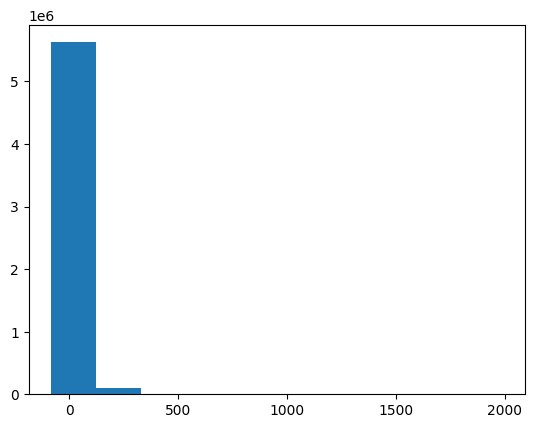

In [18]:
plt.hist(data['DEPARTURE_DELAY'].dropna(), bins=10)

<Axes: xlabel='DELAYED', ylabel='count'>

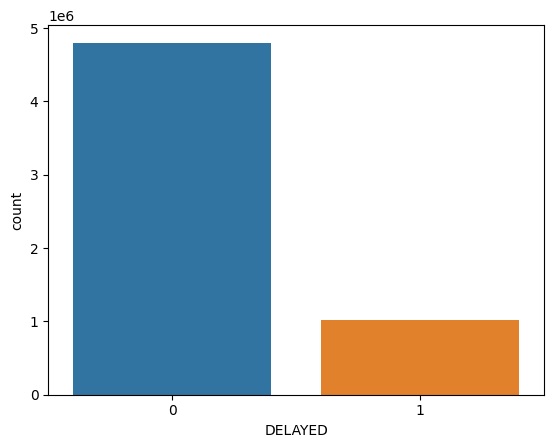

In [19]:
data['DELAYED'] = (data['DEPARTURE_DELAY'] > 15).astype(int)
sns.countplot(x=data['DELAYED'])


<Axes: xlabel='DAY_OF_WEEK', ylabel='DEPARTURE_DELAY'>

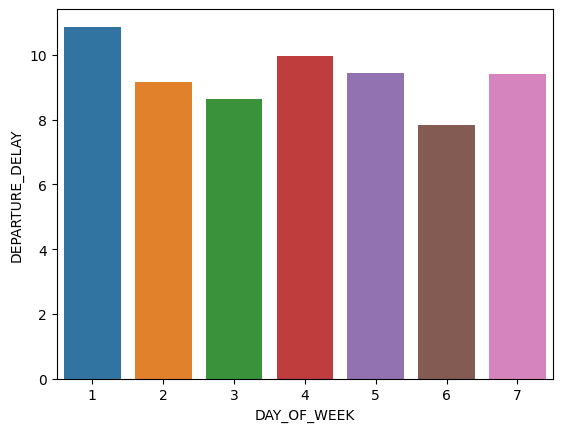

In [20]:
sns.barplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAY', data=data, ci=None)


<Axes: xlabel='DAY', ylabel='MONTH'>

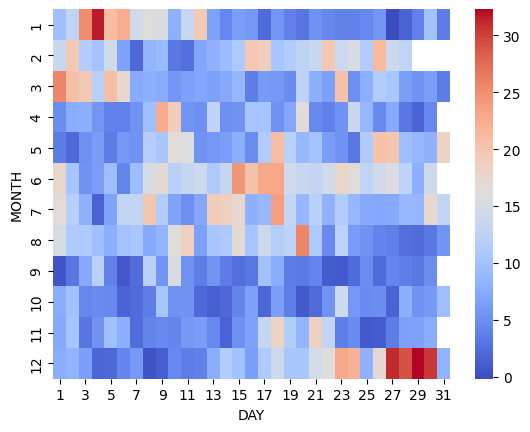

In [21]:
pivot = data.pivot_table(index='MONTH', columns='DAY', values='DEPARTURE_DELAY', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm')


<Axes: ylabel='ORIGIN_AIRPORT'>

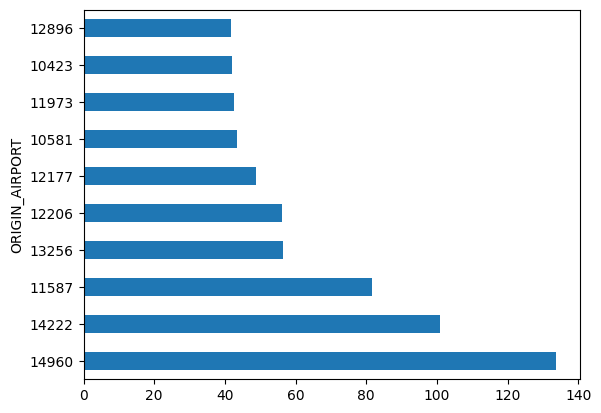

In [22]:
top_airports = data.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)
top_airports.plot(kind='barh')


<Axes: xlabel='AIRLINE', ylabel='DEPARTURE_DELAY'>

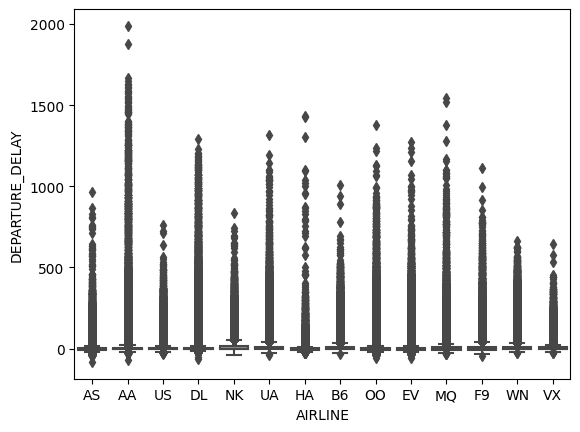

In [23]:
sns.boxplot(x=data['AIRLINE'], y=data['DEPARTURE_DELAY'])


<Axes: >

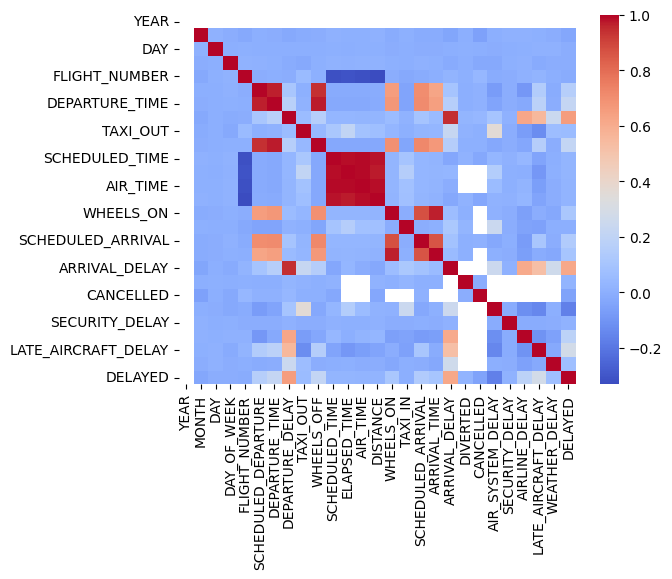

In [24]:
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm')


In [25]:
import numpy as np
import pandas as pd

def preprocess_time_columns(df, time_columns):
    def extract_hour(hhmm):
        hh = hhmm // 100
        return hh.astype(int)

    def hhmm_to_minutes(hhmm):
        hh = hhmm // 100
        mm = hhmm % 100
        return (hh * 60 + mm).astype(int)

    for col in time_columns:
        # Drop NaN values temporarily for safe conversion
        non_null_times = df[col].dropna().astype(int)

        # Hour column
        hour_col = f'{col}_HOUR'
        df[hour_col] = np.nan
        df.loc[non_null_times.index, hour_col] = extract_hour(non_null_times)

        # Cyclical encoding
        df[f'{col}_sin'] = np.nan
        df[f'{col}_cos'] = np.nan
        df.loc[non_null_times.index, f'{col}_sin'] = np.sin(2 * np.pi * df.loc[non_null_times.index, hour_col] / 24)
        df.loc[non_null_times.index, f'{col}_cos'] = np.cos(2 * np.pi * df.loc[non_null_times.index, hour_col] / 24)

        # Minutes since midnight
        df[f'{col}_MIN'] = np.nan
        df.loc[non_null_times.index, f'{col}_MIN'] = hhmm_to_minutes(non_null_times)

        # Drop the original HHMM column
        df.drop(columns=[col], inplace=True)

    return df


time_columns = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']
data = preprocess_time_columns(data, time_columns)


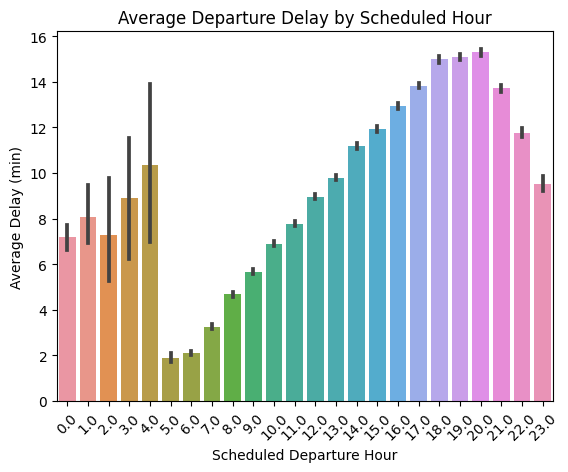

In [26]:
sns.barplot(x='SCHEDULED_DEPARTURE_HOUR', y='DEPARTURE_DELAY', data=data)
plt.title('Average Departure Delay by Scheduled Hour')
plt.xlabel('Scheduled Departure Hour')
plt.ylabel('Average Delay (min)')
plt.xticks(rotation=45)
plt.show()

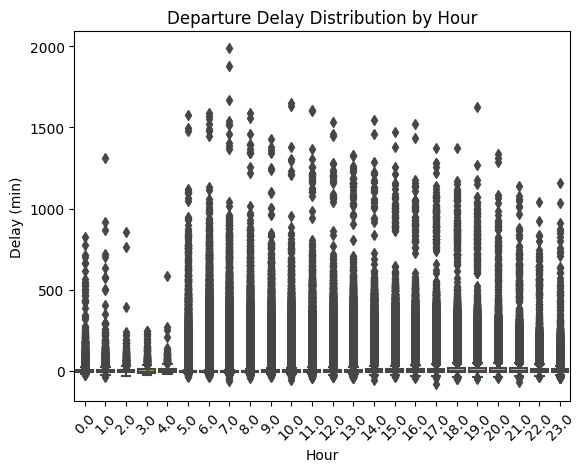

In [27]:
sns.boxplot(x='SCHEDULED_DEPARTURE_HOUR', y='DEPARTURE_DELAY', data=data)
plt.title('Departure Delay Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Delay (min)')
plt.xticks(rotation=45)
plt.show()


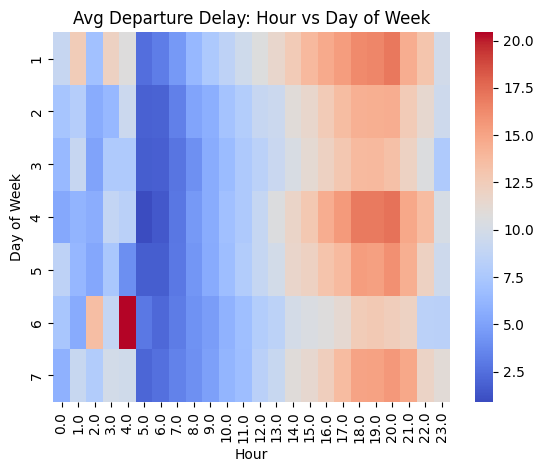

In [28]:
heatmap_data = data.groupby(['DAY_OF_WEEK', 'SCHEDULED_DEPARTURE_HOUR'])['DEPARTURE_DELAY'].mean().unstack()
sns.heatmap(heatmap_data, cmap='coolwarm', fmt=".1f")
plt.title('Avg Departure Delay: Hour vs Day of Week')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.show()


In [29]:
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,DEPARTURE_TIME_cos,DEPARTURE_TIME_MIN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_sin,SCHEDULED_ARRIVAL_cos,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_sin,ARRIVAL_TIME_cos,ARRIVAL_TIME_MIN
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,-11.0,...,0.965926,1434.0,4.0,0.866025,0.500000,270.0,4.0,0.866025,0.500000,248.0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,-8.0,...,1.000000,2.0,7.0,0.965926,-0.258819,470.0,7.0,0.965926,-0.258819,461.0
2,2015,1,1,4,US,840,N171US,SFO,CLT,-2.0,...,1.000000,18.0,8.0,0.866025,-0.500000,486.0,8.0,0.866025,-0.500000,491.0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,-5.0,...,1.000000,15.0,8.0,0.866025,-0.500000,485.0,7.0,0.965926,-0.258819,476.0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,-1.0,...,1.000000,24.0,3.0,0.707107,0.707107,200.0,2.0,0.500000,0.866025,179.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 44 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   AIRLINE                   object 
 5   FLIGHT_NUMBER             int64  
 6   TAIL_NUMBER               object 
 7   ORIGIN_AIRPORT            object 
 8   DESTINATION_AIRPORT       object 
 9   DEPARTURE_DELAY           float64
 10  TAXI_OUT                  float64
 11  WHEELS_OFF                float64
 12  SCHEDULED_TIME            float64
 13  ELAPSED_TIME              float64
 14  AIR_TIME                  float64
 15  DISTANCE                  int64  
 16  WHEELS_ON                 float64
 17  TAXI_IN                   float64
 18  ARRIVAL_DELAY             float64
 19  DIVERTED                  int64  
 20  CANCELLED               

In [31]:
data.isnull().sum()

YEAR                              0
MONTH                             0
DAY                               0
DAY_OF_WEEK                       0
AIRLINE                           0
FLIGHT_NUMBER                     0
TAIL_NUMBER                   14721
ORIGIN_AIRPORT                    0
DESTINATION_AIRPORT               0
DEPARTURE_DELAY               86153
TAXI_OUT                      89047
WHEELS_OFF                    89047
SCHEDULED_TIME                    6
ELAPSED_TIME                 105071
AIR_TIME                     105071
DISTANCE                          0
WHEELS_ON                     92513
TAXI_IN                       92513
ARRIVAL_DELAY                105071
DIVERTED                          0
CANCELLED                         0
CANCELLATION_REASON         5729195
AIR_SYSTEM_DELAY            4755640
SECURITY_DELAY              4755640
AIRLINE_DELAY               4755640
LATE_AIRCRAFT_DELAY         4755640
WEATHER_DELAY               4755640
DELAYED                     

In [32]:
threshold = 0.5  # 50% threshold
data = data.loc[:, data.isnull().mean() <= threshold]

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 38 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   AIRLINE                   object 
 5   FLIGHT_NUMBER             int64  
 6   TAIL_NUMBER               object 
 7   ORIGIN_AIRPORT            object 
 8   DESTINATION_AIRPORT       object 
 9   DEPARTURE_DELAY           float64
 10  TAXI_OUT                  float64
 11  WHEELS_OFF                float64
 12  SCHEDULED_TIME            float64
 13  ELAPSED_TIME              float64
 14  AIR_TIME                  float64
 15  DISTANCE                  int64  
 16  WHEELS_ON                 float64
 17  TAXI_IN                   float64
 18  ARRIVAL_DELAY             float64
 19  DIVERTED                  int64  
 20  CANCELLED               

In [34]:
data.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
AIRLINE                          0
FLIGHT_NUMBER                    0
TAIL_NUMBER                  14721
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
DEPARTURE_DELAY              86153
TAXI_OUT                     89047
WHEELS_OFF                   89047
SCHEDULED_TIME                   6
ELAPSED_TIME                105071
AIR_TIME                    105071
DISTANCE                         0
WHEELS_ON                    92513
TAXI_IN                      92513
ARRIVAL_DELAY               105071
DIVERTED                         0
CANCELLED                        0
DELAYED                          0
SCHEDULED_DEPARTURE_HOUR         0
SCHEDULED_DEPARTURE_sin          0
SCHEDULED_DEPARTURE_cos          0
SCHEDULED_DEPARTURE_MIN          0
DEPARTURE_TIME_HOUR          86153
DEPARTURE_TIME_sin           86153
DEPARTURE_TIME_cos  

In [35]:
irrelevant_cols = ['FLIGHT_NUMBER', 'TAIL_NUMBER', 'WHEELS_OFF', 'WHEELS_ON']
data= data.drop(columns=irrelevant_cols)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   AIRLINE                   object 
 5   ORIGIN_AIRPORT            object 
 6   DESTINATION_AIRPORT       object 
 7   DEPARTURE_DELAY           float64
 8   TAXI_OUT                  float64
 9   SCHEDULED_TIME            float64
 10  ELAPSED_TIME              float64
 11  AIR_TIME                  float64
 12  DISTANCE                  int64  
 13  TAXI_IN                   float64
 14  ARRIVAL_DELAY             float64
 15  DIVERTED                  int64  
 16  CANCELLED                 int64  
 17  DELAYED                   int64  
 18  SCHEDULED_DEPARTURE_HOUR  float64
 19  SCHEDULED_DEPARTURE_sin   float64
 20  SCHEDULED_DEPARTURE_cos 

In [37]:
data['DELAYED'].value_counts()

DELAYED
0    4800521
1    1018558
Name: count, dtype: int64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   AIRLINE                   object 
 5   ORIGIN_AIRPORT            object 
 6   DESTINATION_AIRPORT       object 
 7   DEPARTURE_DELAY           float64
 8   TAXI_OUT                  float64
 9   SCHEDULED_TIME            float64
 10  ELAPSED_TIME              float64
 11  AIR_TIME                  float64
 12  DISTANCE                  int64  
 13  TAXI_IN                   float64
 14  ARRIVAL_DELAY             float64
 15  DIVERTED                  int64  
 16  CANCELLED                 int64  
 17  DELAYED                   int64  
 18  SCHEDULED_DEPARTURE_HOUR  float64
 19  SCHEDULED_DEPARTURE_sin   float64
 20  SCHEDULED_DEPARTURE_cos 

In [39]:
data.isnull().sum()

YEAR                             0
MONTH                            0
DAY                              0
DAY_OF_WEEK                      0
AIRLINE                          0
ORIGIN_AIRPORT                   0
DESTINATION_AIRPORT              0
DEPARTURE_DELAY              86153
TAXI_OUT                     89047
SCHEDULED_TIME                   6
ELAPSED_TIME                105071
AIR_TIME                    105071
DISTANCE                         0
TAXI_IN                      92513
ARRIVAL_DELAY               105071
DIVERTED                         0
CANCELLED                        0
DELAYED                          0
SCHEDULED_DEPARTURE_HOUR         0
SCHEDULED_DEPARTURE_sin          0
SCHEDULED_DEPARTURE_cos          0
SCHEDULED_DEPARTURE_MIN          0
DEPARTURE_TIME_HOUR          86153
DEPARTURE_TIME_sin           86153
DEPARTURE_TIME_cos           86153
DEPARTURE_TIME_MIN           86153
SCHEDULED_ARRIVAL_HOUR           0
SCHEDULED_ARRIVAL_sin            0
SCHEDULED_ARRIVAL_co

In [40]:
# Calculate percentage of missing values per column
missing_percent = data.isnull().mean() * 100

# Print percentage for each column separately
for column, percent in missing_percent.items():
    print(f"Column '{column}': {percent:.2f}% missing values")

Column 'YEAR': 0.00% missing values
Column 'MONTH': 0.00% missing values
Column 'DAY': 0.00% missing values
Column 'DAY_OF_WEEK': 0.00% missing values
Column 'AIRLINE': 0.00% missing values
Column 'ORIGIN_AIRPORT': 0.00% missing values
Column 'DESTINATION_AIRPORT': 0.00% missing values
Column 'DEPARTURE_DELAY': 1.48% missing values
Column 'TAXI_OUT': 1.53% missing values
Column 'SCHEDULED_TIME': 0.00% missing values
Column 'ELAPSED_TIME': 1.81% missing values
Column 'AIR_TIME': 1.81% missing values
Column 'DISTANCE': 0.00% missing values
Column 'TAXI_IN': 1.59% missing values
Column 'ARRIVAL_DELAY': 1.81% missing values
Column 'DIVERTED': 0.00% missing values
Column 'CANCELLED': 0.00% missing values
Column 'DELAYED': 0.00% missing values
Column 'SCHEDULED_DEPARTURE_HOUR': 0.00% missing values
Column 'SCHEDULED_DEPARTURE_sin': 0.00% missing values
Column 'SCHEDULED_DEPARTURE_cos': 0.00% missing values
Column 'SCHEDULED_DEPARTURE_MIN': 0.00% missing values
Column 'DEPARTURE_TIME_HOUR': 1

In [41]:
data = data.dropna()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   YEAR                      int64  
 1   MONTH                     int64  
 2   DAY                       int64  
 3   DAY_OF_WEEK               int64  
 4   AIRLINE                   object 
 5   ORIGIN_AIRPORT            object 
 6   DESTINATION_AIRPORT       object 
 7   DEPARTURE_DELAY           float64
 8   TAXI_OUT                  float64
 9   SCHEDULED_TIME            float64
 10  ELAPSED_TIME              float64
 11  AIR_TIME                  float64
 12  DISTANCE                  int64  
 13  TAXI_IN                   float64
 14  ARRIVAL_DELAY             float64
 15  DIVERTED                  int64  
 16  CANCELLED                 int64  
 17  DELAYED                   int64  
 18  SCHEDULED_DEPARTURE_HOUR  float64
 19  SCHEDULED_DEPARTURE_sin   float64
 20  SCHEDULED_DEPARTURE_cos   flo

In [43]:
data.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
DEPARTURE_DELAY             0
TAXI_OUT                    0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_TIME                    0
DISTANCE                    0
TAXI_IN                     0
ARRIVAL_DELAY               0
DIVERTED                    0
CANCELLED                   0
DELAYED                     0
SCHEDULED_DEPARTURE_HOUR    0
SCHEDULED_DEPARTURE_sin     0
SCHEDULED_DEPARTURE_cos     0
SCHEDULED_DEPARTURE_MIN     0
DEPARTURE_TIME_HOUR         0
DEPARTURE_TIME_sin          0
DEPARTURE_TIME_cos          0
DEPARTURE_TIME_MIN          0
SCHEDULED_ARRIVAL_HOUR      0
SCHEDULED_ARRIVAL_sin       0
SCHEDULED_ARRIVAL_cos       0
SCHEDULED_ARRIVAL_MIN       0
ARRIVAL_TIME_HOUR           0
ARRIVAL_TIME_sin            0
ARRIVAL_TIME_cos            0
ARRIVAL_TI

In [44]:
# Define pairs to combine
cyclical_features = ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']

for feat in cyclical_features:
    sin_col = f'{feat}_sin'
    cos_col = f'{feat}_cos'
    combined_col = f'{feat}_angle'
    
    data[combined_col] = np.arctan2(data[sin_col], data[cos_col])


In [45]:
data.drop(columns=[f'{feat}_sin' for feat in cyclical_features] + 
                  [f'{feat}_cos' for feat in cyclical_features], inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 30 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   YEAR                       int64  
 1   MONTH                      int64  
 2   DAY                        int64  
 3   DAY_OF_WEEK                int64  
 4   AIRLINE                    object 
 5   ORIGIN_AIRPORT             object 
 6   DESTINATION_AIRPORT        object 
 7   DEPARTURE_DELAY            float64
 8   TAXI_OUT                   float64
 9   SCHEDULED_TIME             float64
 10  ELAPSED_TIME               float64
 11  AIR_TIME                   float64
 12  DISTANCE                   int64  
 13  TAXI_IN                    float64
 14  ARRIVAL_DELAY              float64
 15  DIVERTED                   int64  
 16  CANCELLED                  int64  
 17  DELAYED                    int64  
 18  SCHEDULED_DEPARTURE_HOUR   float64
 19  SCHEDULED_DEPARTURE_MIN    float64
 20  DEPARTU

In [47]:
X = data.drop('DELAYED', axis = 1)
y = data['DELAYED']

In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: DELAYED, dtype: int64

In [49]:
y.value_counts()

DELAYED
0    4702421
1    1011587
Name: count, dtype: int64

In [50]:
X.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,...,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MIN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MIN,SCHEDULED_DEPARTURE_angle,DEPARTURE_TIME_angle,SCHEDULED_ARRIVAL_angle,ARRIVAL_TIME_angle
0,2015,1,1,4,AS,ANC,SEA,-11.0,21.0,205.0,...,23.0,1434.0,4.0,270.0,4.0,248.0,0.0,-0.261799,1.047198,1.047198
1,2015,1,1,4,AA,LAX,PBI,-8.0,12.0,280.0,...,0.0,2.0,7.0,470.0,7.0,461.0,0.0,0.000000,1.832596,1.832596
2,2015,1,1,4,US,SFO,CLT,-2.0,16.0,286.0,...,0.0,18.0,8.0,486.0,8.0,491.0,0.0,0.000000,2.094395,2.094395
3,2015,1,1,4,AA,LAX,MIA,-5.0,15.0,285.0,...,0.0,15.0,8.0,485.0,7.0,476.0,0.0,0.000000,2.094395,1.832596
4,2015,1,1,4,AS,SEA,ANC,-1.0,11.0,235.0,...,0.0,24.0,3.0,200.0,2.0,179.0,0.0,0.000000,0.785398,0.523599


In [51]:
X.shape

(5714008, 29)

In [52]:
X['ORIGIN_AIRPORT'].value_counts()

ORIGIN_AIRPORT
ATL      343506
ORD      276554
DFW      232647
DEN      193402
LAX      192003
          ...  
14222         1
14025         1
13502         1
15497         1
12265         1
Name: count, Length: 929, dtype: int64

In [53]:
X['ORIGIN_AIRPORT'].nunique()


929

In [54]:
X['DESTINATION_AIRPORT'].nunique()

929

In [55]:
from sklearn.preprocessing import LabelEncoder
def encode_columns(df):
    le = LabelEncoder()
    
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is an object (categorical)
            unique_count = df[column].nunique()  # Get the number of unique values
            
            # Handle mixed data types by converting the column to strings
            df[column] = df[column].astype(str)
            
            if unique_count > 10:
                # Apply Label Encoding if more than 10 unique values
                df[column] = le.fit_transform(df[column])
                print(f"Label Encoding applied on {column}")
            else:
                # Apply One-Hot Encoding if 10 or fewer unique values, dropping one column to avoid multicollinearity
                df_encoded = pd.get_dummies(df[column], drop_first=True)
                df = pd.concat([df, df_encoded], axis=1).drop([column], axis=1)
                print(f"One-Hot Encoding applied on {column}")
    
    return df

In [56]:
X = encode_columns(X)

Label Encoding applied on AIRLINE
Label Encoding applied on ORIGIN_AIRPORT
Label Encoding applied on DESTINATION_AIRPORT


In [57]:
X.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,SCHEDULED_TIME,...,DEPARTURE_TIME_HOUR,DEPARTURE_TIME_MIN,SCHEDULED_ARRIVAL_HOUR,SCHEDULED_ARRIVAL_MIN,ARRIVAL_TIME_HOUR,ARRIVAL_TIME_MIN,SCHEDULED_DEPARTURE_angle,DEPARTURE_TIME_angle,SCHEDULED_ARRIVAL_angle,ARRIVAL_TIME_angle
0,2015,1,1,4,1,323,584,-11.0,21.0,205.0,...,23.0,1434.0,4.0,270.0,4.0,248.0,0.0,-0.261799,1.047198,1.047198
1,2015,1,1,4,0,482,542,-8.0,12.0,280.0,...,0.0,2.0,7.0,470.0,7.0,461.0,0.0,0.000000,1.832596,1.832596
2,2015,1,1,4,11,584,373,-2.0,16.0,286.0,...,0.0,18.0,8.0,486.0,8.0,491.0,0.0,0.000000,2.094395,2.094395
3,2015,1,1,4,0,482,510,-5.0,15.0,285.0,...,0.0,15.0,8.0,485.0,7.0,476.0,0.0,0.000000,2.094395,1.832596
4,2015,1,1,4,1,583,324,-1.0,11.0,235.0,...,0.0,24.0,3.0,200.0,2.0,179.0,0.0,0.000000,0.785398,0.523599


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 29 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   YEAR                       int64  
 1   MONTH                      int64  
 2   DAY                        int64  
 3   DAY_OF_WEEK                int64  
 4   AIRLINE                    int64  
 5   ORIGIN_AIRPORT             int64  
 6   DESTINATION_AIRPORT        int64  
 7   DEPARTURE_DELAY            float64
 8   TAXI_OUT                   float64
 9   SCHEDULED_TIME             float64
 10  ELAPSED_TIME               float64
 11  AIR_TIME                   float64
 12  DISTANCE                   int64  
 13  TAXI_IN                    float64
 14  ARRIVAL_DELAY              float64
 15  DIVERTED                   int64  
 16  CANCELLED                  int64  
 17  SCHEDULED_DEPARTURE_HOUR   float64
 18  SCHEDULED_DEPARTURE_MIN    float64
 19  DEPARTURE_TIME_HOUR        float64
 20  DEPARTU

In [59]:
X.drop('YEAR', axis = 1, inplace = True)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5714008 entries, 0 to 5819078
Data columns (total 28 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   MONTH                      int64  
 1   DAY                        int64  
 2   DAY_OF_WEEK                int64  
 3   AIRLINE                    int64  
 4   ORIGIN_AIRPORT             int64  
 5   DESTINATION_AIRPORT        int64  
 6   DEPARTURE_DELAY            float64
 7   TAXI_OUT                   float64
 8   SCHEDULED_TIME             float64
 9   ELAPSED_TIME               float64
 10  AIR_TIME                   float64
 11  DISTANCE                   int64  
 12  TAXI_IN                    float64
 13  ARRIVAL_DELAY              float64
 14  DIVERTED                   int64  
 15  CANCELLED                  int64  
 16  SCHEDULED_DEPARTURE_HOUR   float64
 17  SCHEDULED_DEPARTURE_MIN    float64
 18  DEPARTURE_TIME_HOUR        float64
 19  DEPARTURE_TIME_MIN         float64
 20  SCHEDUL

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy import stats

def check_and_scale_numerical_columns(df):
    # Function to detect outliers using IQR method
    def detect_outliers_iqr(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return (series < lower_bound) | (series > upper_bound)

    # Iterate through each column in the dataframe
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        # Plot the distribution of the column
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.show()

        # Check if the data has outliers using IQR
        outliers = detect_outliers_iqr(df[column])
        num_outliers = outliers.sum()

        # Analyzing the distribution
        print(f"Column: {column}")
        print(f"Number of outliers: {num_outliers}")
        print(f"Skewness: {df[column].skew()}")
        print(f"Kurtosis: {df[column].kurtosis()}")
        
        # Applying appropriate scaling based on conditions
        if num_outliers > 0:
            # If there are outliers, apply Robust Scaling
            scaler = RobustScaler()
            df[column] = scaler.fit_transform(df[[column]])
            print(f"Applied RobustScaler to {column} (Outliers detected)")
        else:
            # Check for skewness and apply scaling accordingly
            if abs(df[column].skew()) > 0.5:  # Skewed data
                # Apply Standard Scaling (Z-score normalization)
                scaler = StandardScaler()
                df[column] = scaler.fit_transform(df[[column]])
                print(f"Applied StandardScaler to {column} (Skewed data detected)")
            else:
                # If the data is normally distributed, apply Min-Max Scaling
                scaler = MinMaxScaler()
                df[column] = scaler.fit_transform(df[[column]])
                print(f"Applied MinMaxScaler to {column} (Data is normally distributed)")
        
        print("\n" + "-"*50 + "\n")
    
    return df


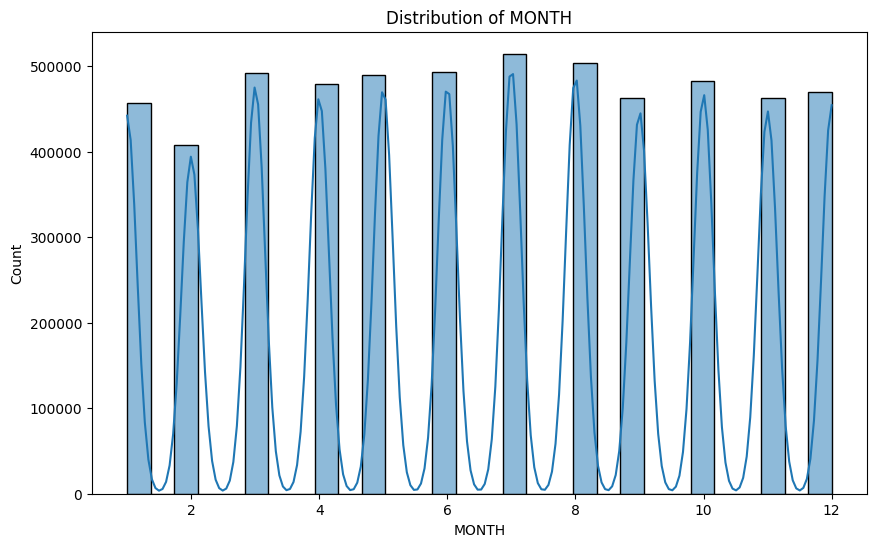

Column: MONTH
Number of outliers: 0
Skewness: -0.013267628796203723
Kurtosis: -1.1706512401131874
Applied MinMaxScaler to MONTH (Data is normally distributed)

--------------------------------------------------



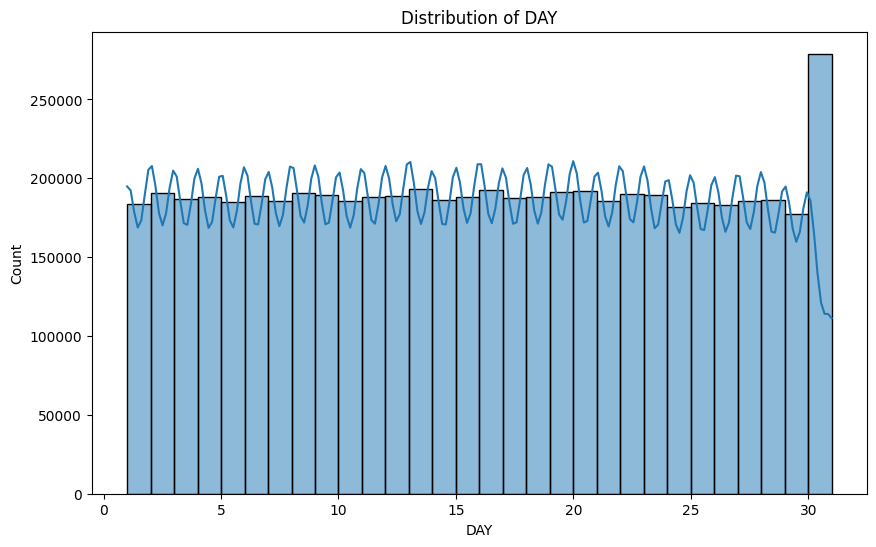

Column: DAY
Number of outliers: 0
Skewness: 0.01041895352197523
Kurtosis: -1.1865392395257848
Applied MinMaxScaler to DAY (Data is normally distributed)

--------------------------------------------------



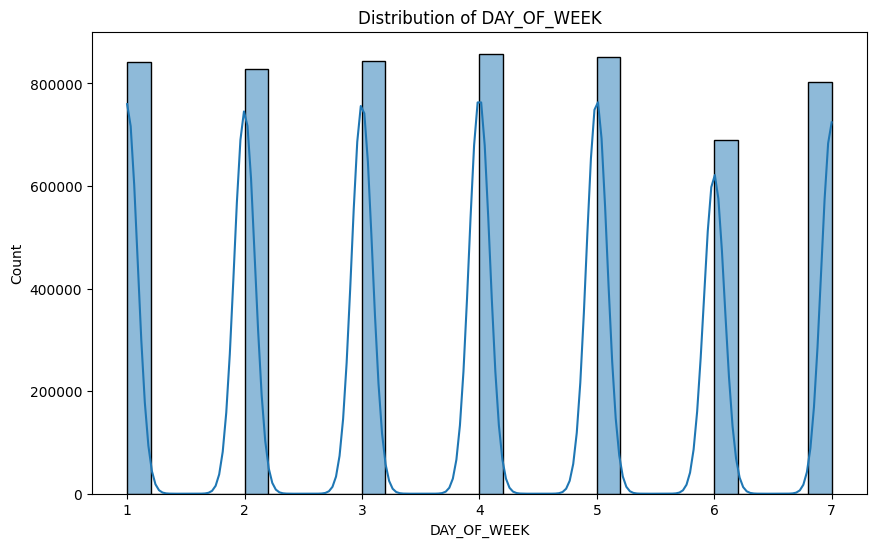

Column: DAY_OF_WEEK
Number of outliers: 0
Skewness: 0.05369449353255572
Kurtosis: -1.2089793961189925
Applied MinMaxScaler to DAY_OF_WEEK (Data is normally distributed)

--------------------------------------------------



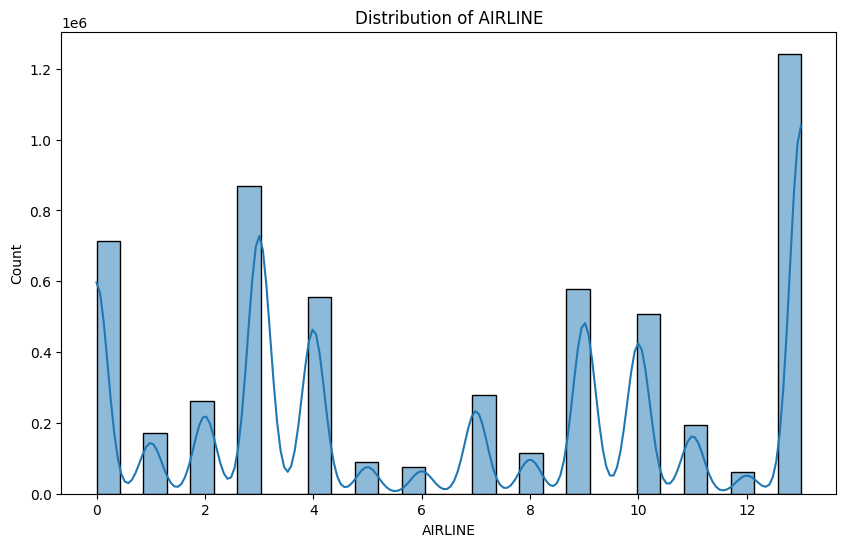

Column: AIRLINE
Number of outliers: 0
Skewness: 0.020470042642830175
Kurtosis: -1.4586520023753606
Applied MinMaxScaler to AIRLINE (Data is normally distributed)

--------------------------------------------------



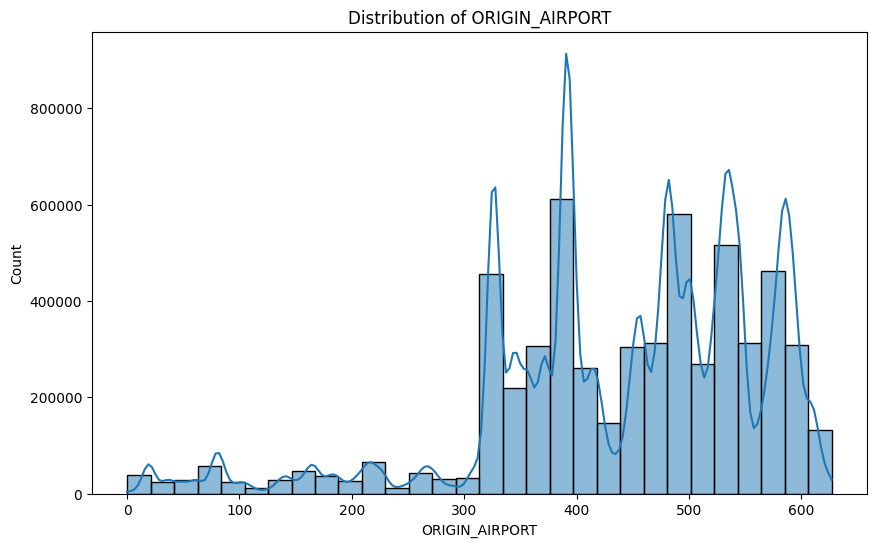

Column: ORIGIN_AIRPORT
Number of outliers: 188672
Skewness: -1.074296278926158
Kurtosis: 1.321095462758164
Applied RobustScaler to ORIGIN_AIRPORT (Outliers detected)

--------------------------------------------------



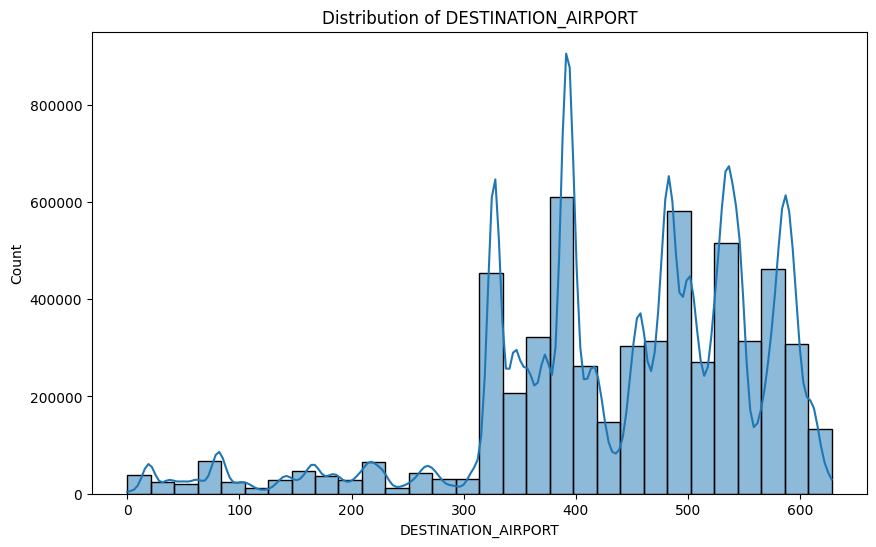

Column: DESTINATION_AIRPORT
Number of outliers: 188559
Skewness: -1.0756248539492024
Kurtosis: 1.32687170703442
Applied RobustScaler to DESTINATION_AIRPORT (Outliers detected)

--------------------------------------------------



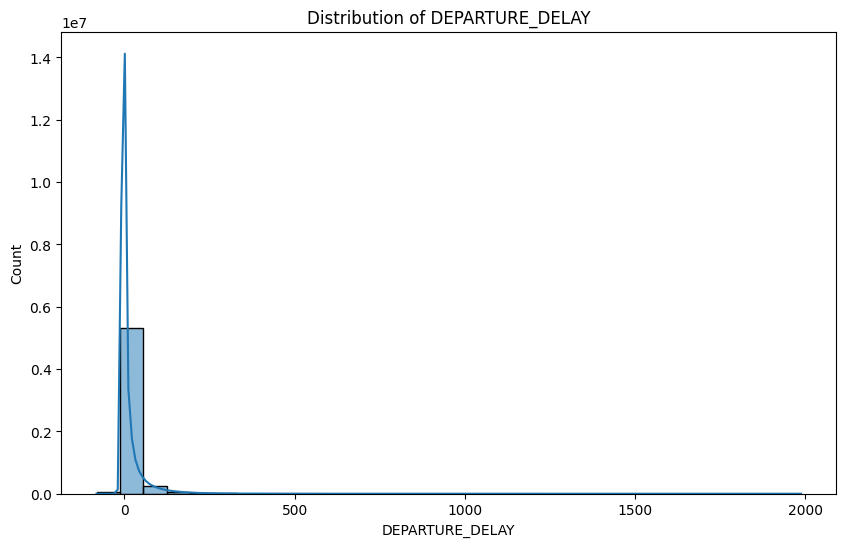

Column: DEPARTURE_DELAY
Number of outliers: 730519
Skewness: 7.60058561435183
Kurtosis: 123.5478578343843
Applied RobustScaler to DEPARTURE_DELAY (Outliers detected)

--------------------------------------------------



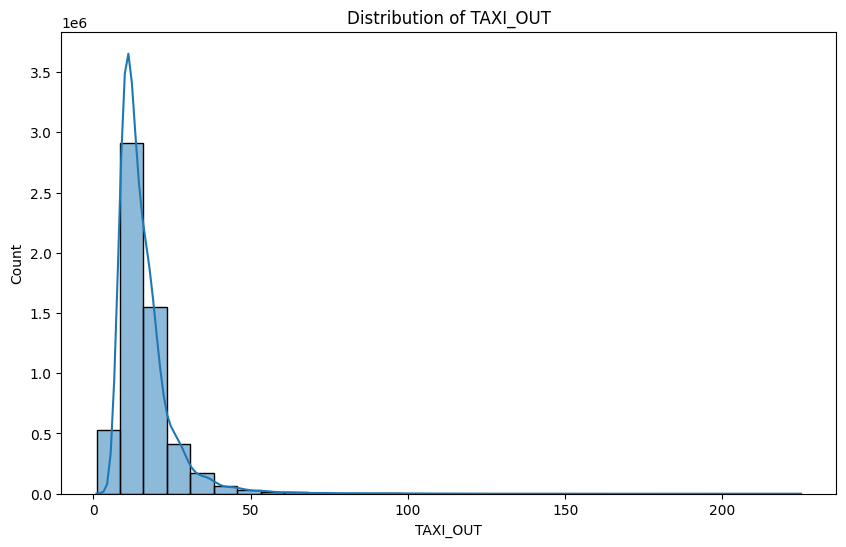

Column: TAXI_OUT
Number of outliers: 281167
Skewness: 3.4609664832480815
Kurtosis: 23.94410563408867
Applied RobustScaler to TAXI_OUT (Outliers detected)

--------------------------------------------------



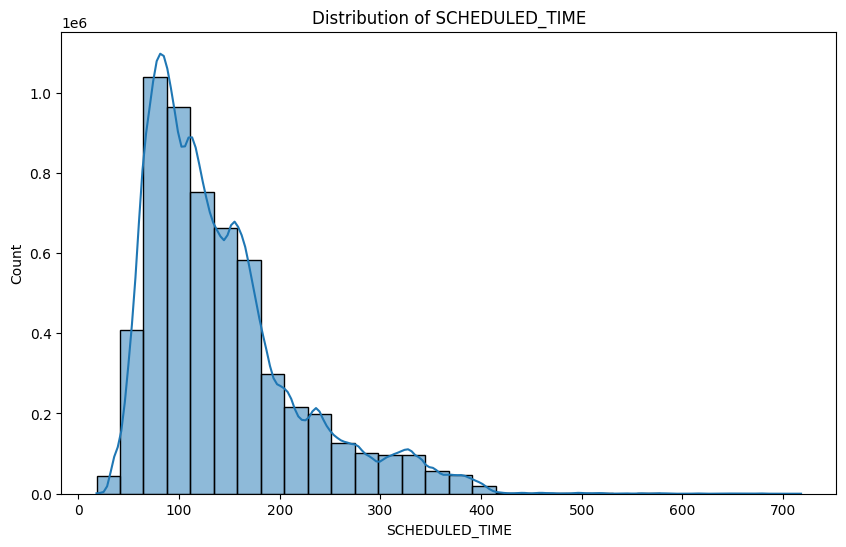

Column: SCHEDULED_TIME
Number of outliers: 289411
Skewness: 1.3405919196033644
Kurtosis: 1.94302677871202
Applied RobustScaler to SCHEDULED_TIME (Outliers detected)

--------------------------------------------------



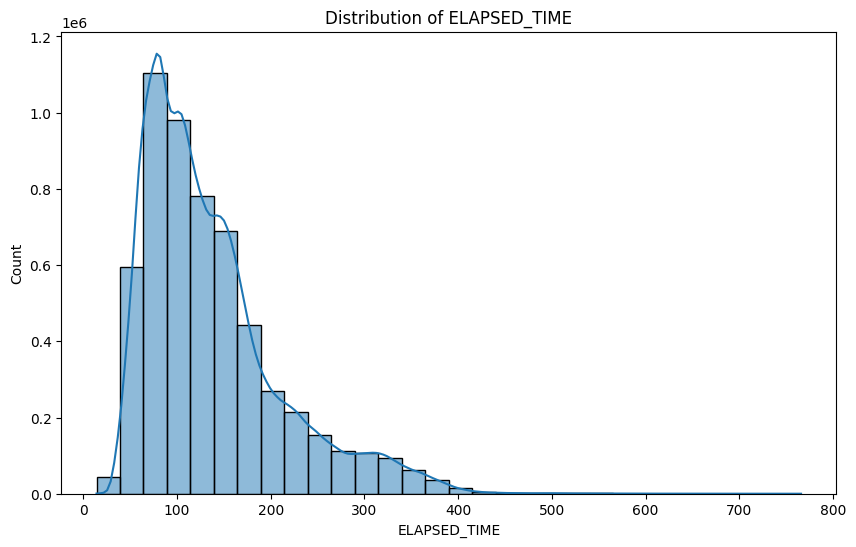

Column: ELAPSED_TIME
Number of outliers: 291084
Skewness: 1.3532223394164908
Kurtosis: 2.054316541096716
Applied RobustScaler to ELAPSED_TIME (Outliers detected)

--------------------------------------------------



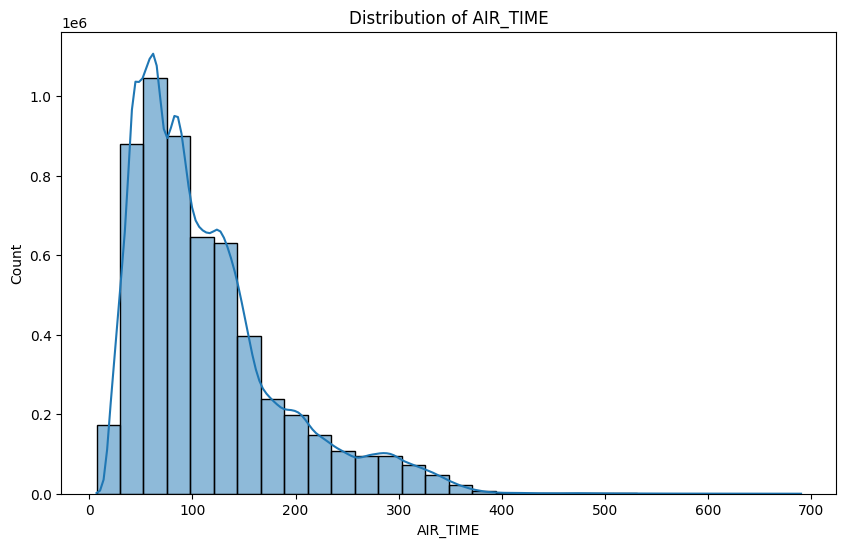

Column: AIR_TIME
Number of outliers: 296342
Skewness: 1.3783416533756454
Kurtosis: 2.0956914987673496
Applied RobustScaler to AIR_TIME (Outliers detected)

--------------------------------------------------



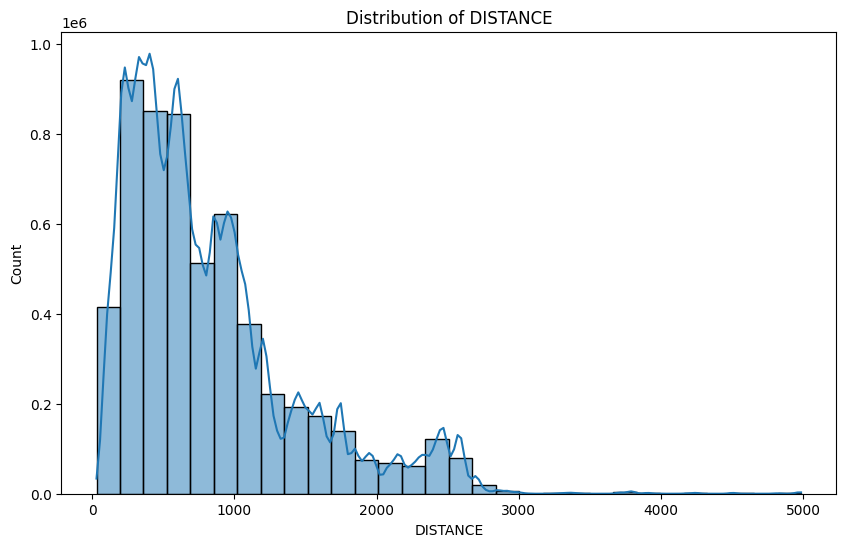

Column: DISTANCE
Number of outliers: 345365
Skewness: 1.4177778346690773
Kurtosis: 2.227032159347809
Applied RobustScaler to DISTANCE (Outliers detected)

--------------------------------------------------



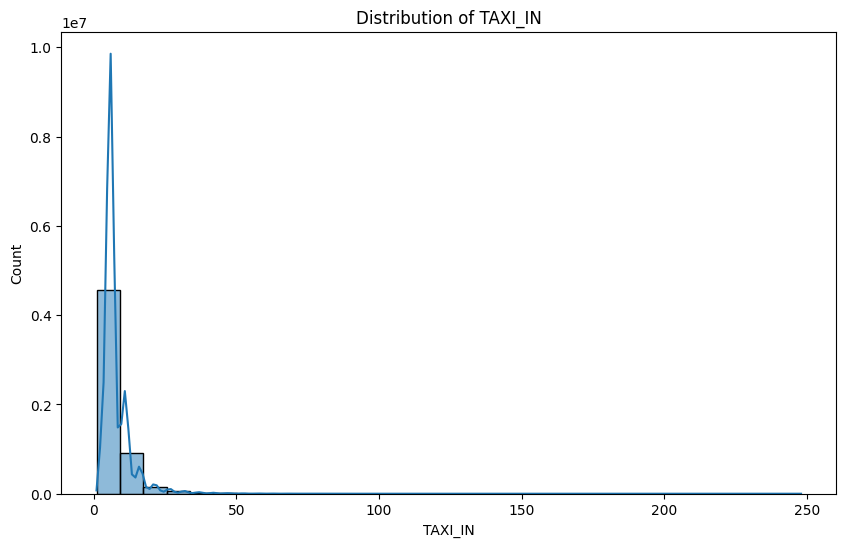

Column: TAXI_IN
Number of outliers: 281089
Skewness: 5.096667990206363
Kurtosis: 58.31361498398744
Applied RobustScaler to TAXI_IN (Outliers detected)

--------------------------------------------------



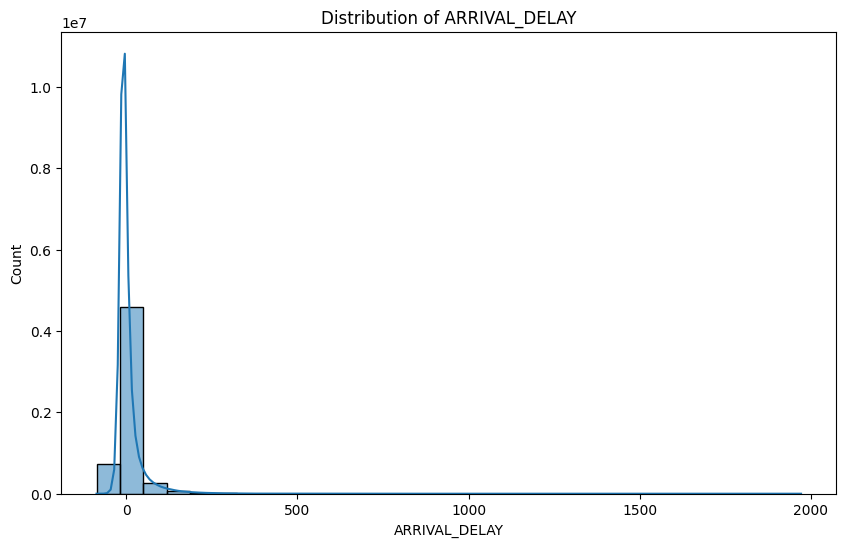

Column: ARRIVAL_DELAY
Number of outliers: 512002
Skewness: 6.502896211878403
Kurtosis: 97.73980267028816
Applied RobustScaler to ARRIVAL_DELAY (Outliers detected)

--------------------------------------------------



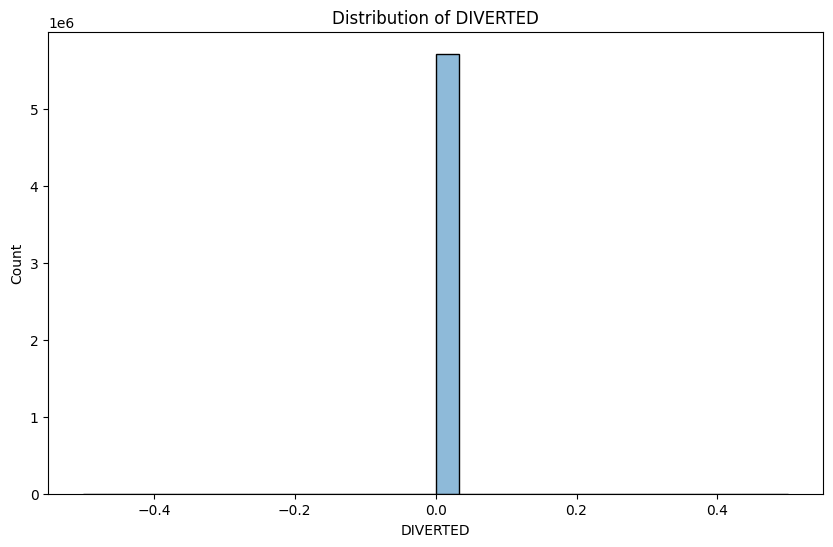

Column: DIVERTED
Number of outliers: 0
Skewness: 0.0
Kurtosis: 0.0
Applied MinMaxScaler to DIVERTED (Data is normally distributed)

--------------------------------------------------



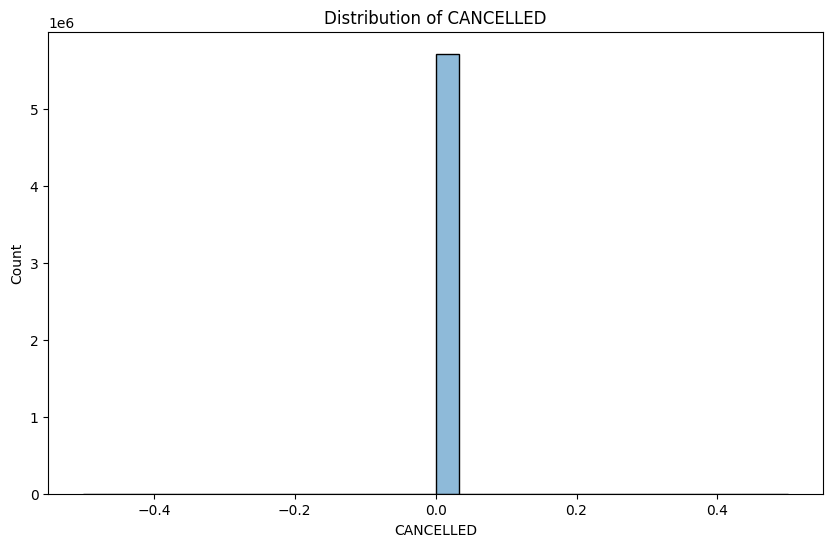

Column: CANCELLED
Number of outliers: 0
Skewness: 0.0
Kurtosis: 0.0
Applied MinMaxScaler to CANCELLED (Data is normally distributed)

--------------------------------------------------



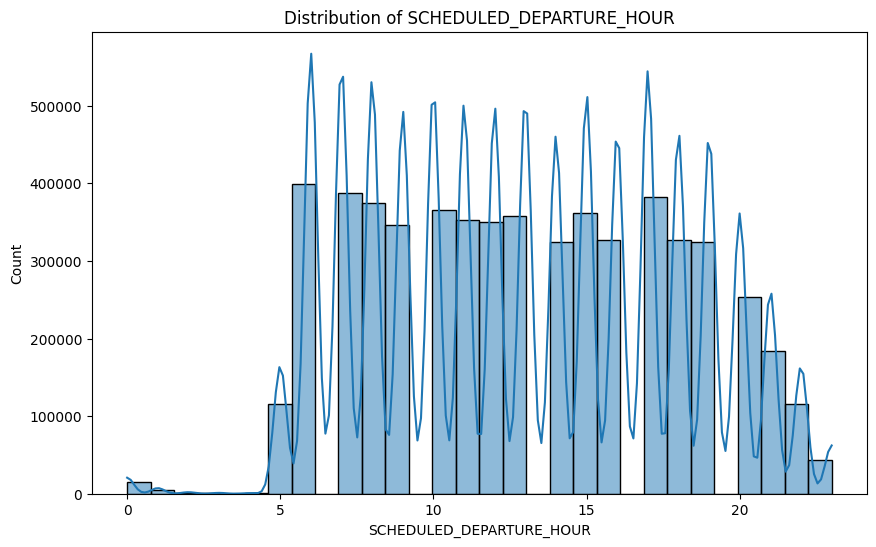

Column: SCHEDULED_DEPARTURE_HOUR
Number of outliers: 0
Skewness: 0.06539169638823958
Kurtosis: -1.0107419347685158
Applied MinMaxScaler to SCHEDULED_DEPARTURE_HOUR (Data is normally distributed)

--------------------------------------------------



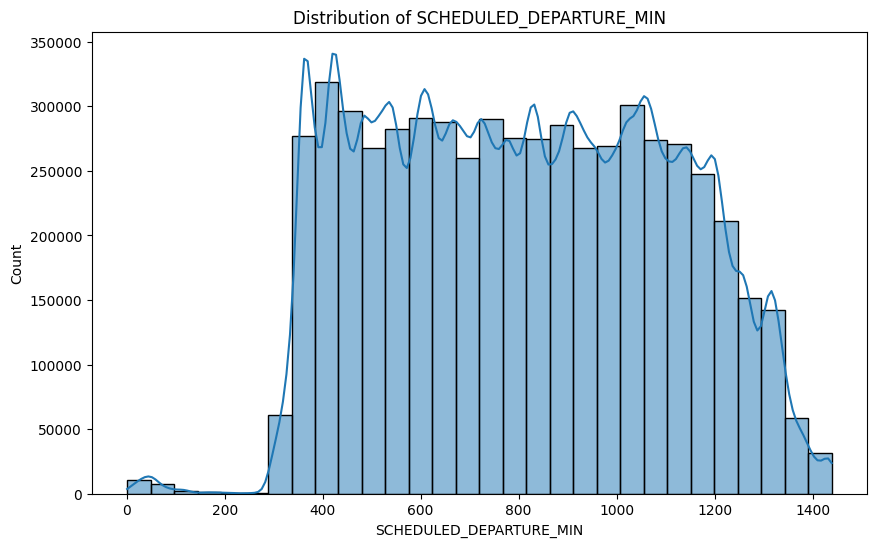

Column: SCHEDULED_DEPARTURE_MIN
Number of outliers: 0
Skewness: 0.057934753145153374
Kurtosis: -1.0166523459751455
Applied MinMaxScaler to SCHEDULED_DEPARTURE_MIN (Data is normally distributed)

--------------------------------------------------



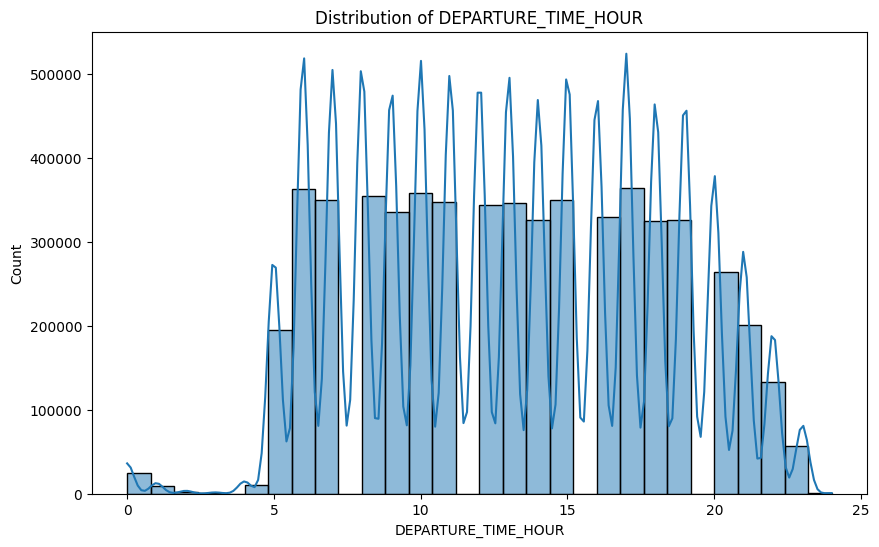

Column: DEPARTURE_TIME_HOUR
Number of outliers: 0
Skewness: 0.018139564748718896
Kurtosis: -0.9633554809056695
Applied MinMaxScaler to DEPARTURE_TIME_HOUR (Data is normally distributed)

--------------------------------------------------



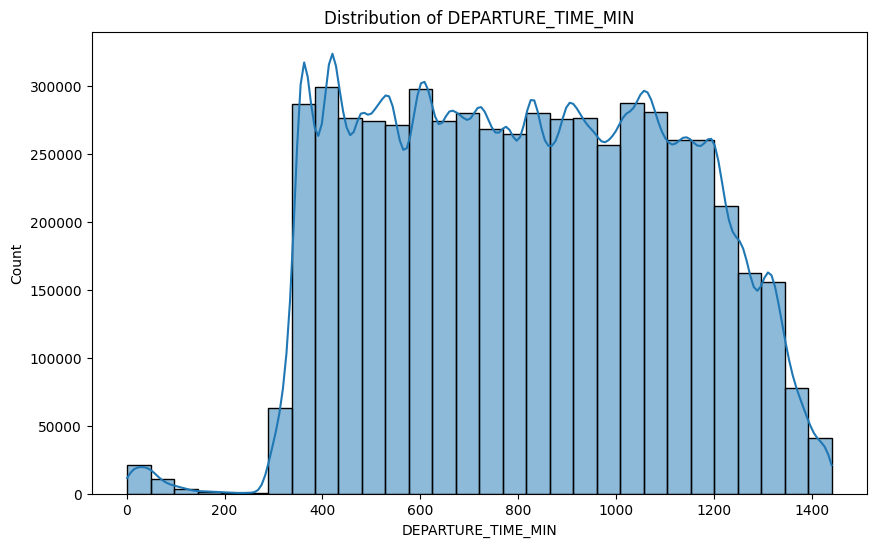

Column: DEPARTURE_TIME_MIN
Number of outliers: 0
Skewness: 0.021704184045642665
Kurtosis: -0.9663570391383702
Applied MinMaxScaler to DEPARTURE_TIME_MIN (Data is normally distributed)

--------------------------------------------------



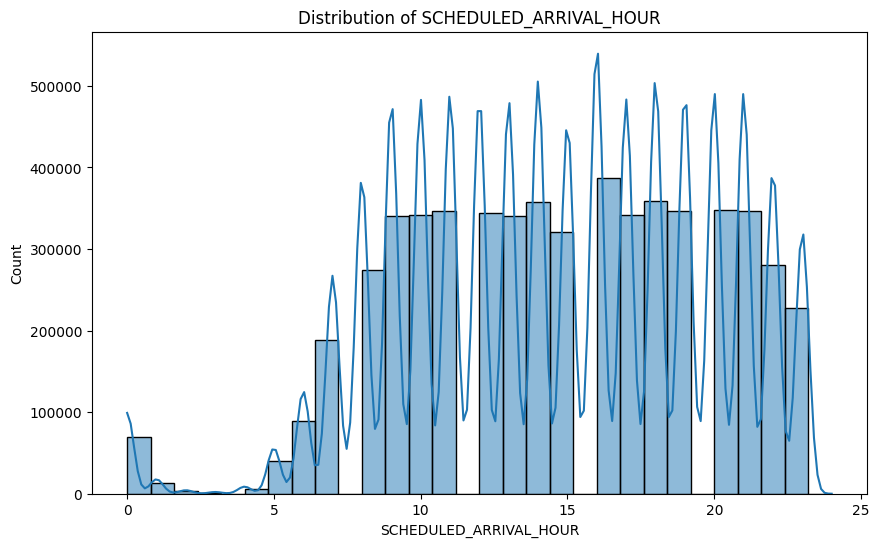

Column: SCHEDULED_ARRIVAL_HOUR
Number of outliers: 0
Skewness: -0.2829549136731524
Kurtosis: -0.5057874987337936
Applied MinMaxScaler to SCHEDULED_ARRIVAL_HOUR (Data is normally distributed)

--------------------------------------------------



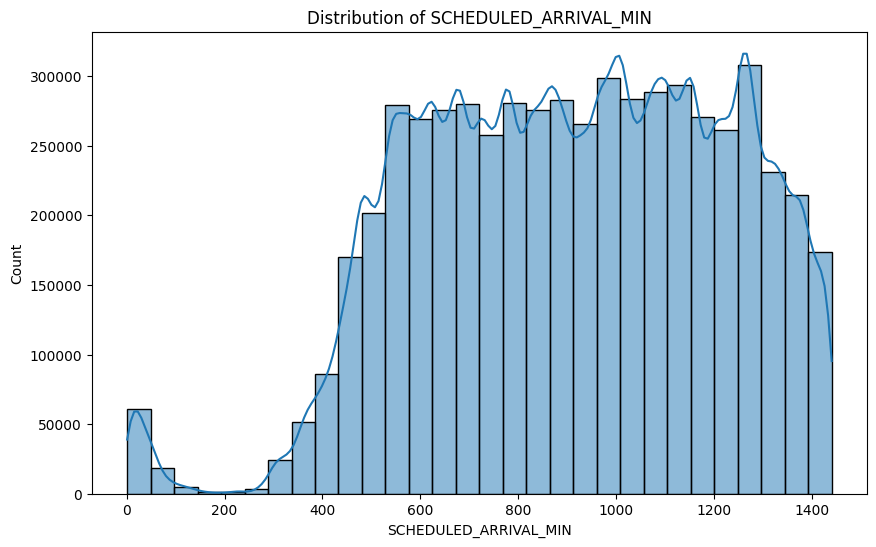

Column: SCHEDULED_ARRIVAL_MIN
Number of outliers: 0
Skewness: -0.2838982619019292
Kurtosis: -0.4885934564582688
Applied MinMaxScaler to SCHEDULED_ARRIVAL_MIN (Data is normally distributed)

--------------------------------------------------



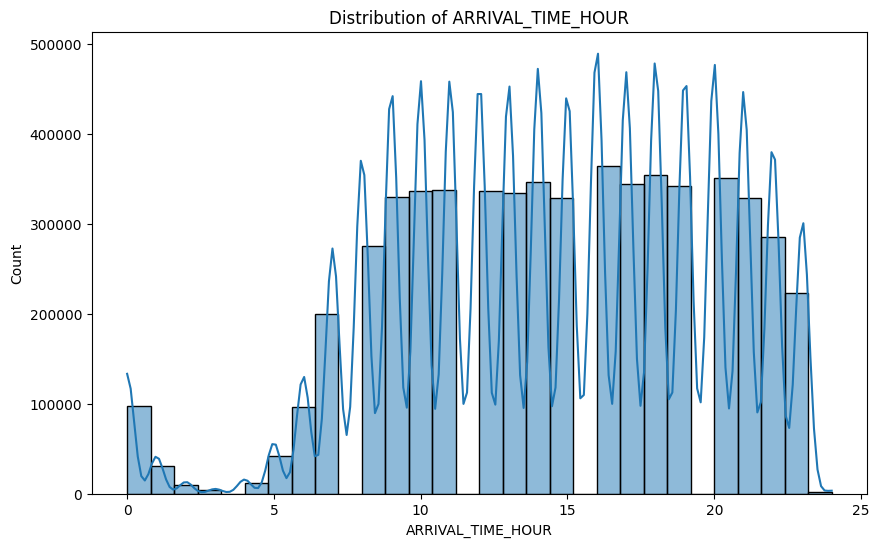

Column: ARRIVAL_TIME_HOUR
Number of outliers: 0
Skewness: -0.3565941284631846
Kurtosis: -0.39060106693634244
Applied MinMaxScaler to ARRIVAL_TIME_HOUR (Data is normally distributed)

--------------------------------------------------



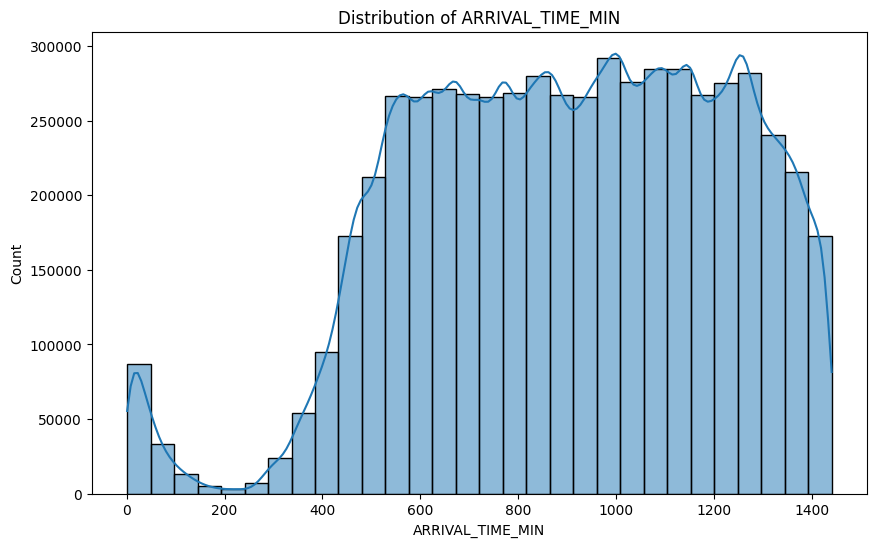

Column: ARRIVAL_TIME_MIN
Number of outliers: 0
Skewness: -0.36165725219593964
Kurtosis: -0.3665937740644525
Applied MinMaxScaler to ARRIVAL_TIME_MIN (Data is normally distributed)

--------------------------------------------------



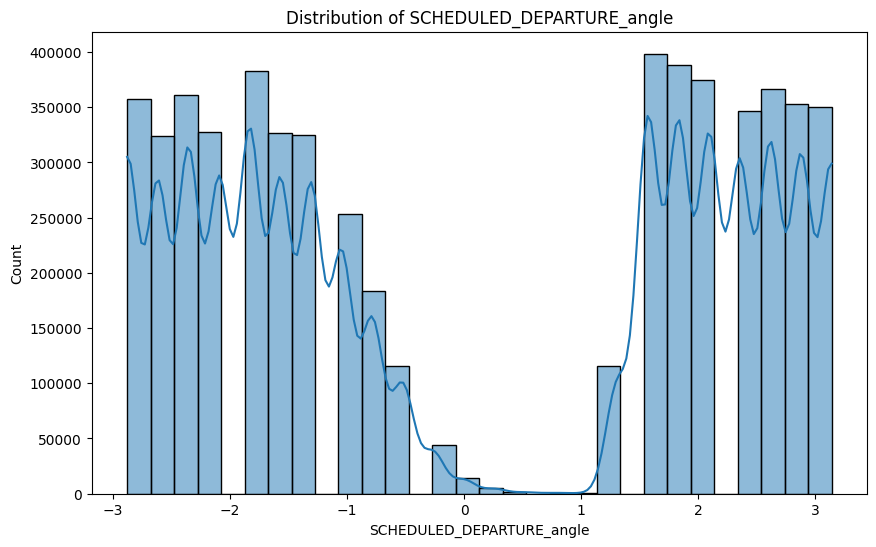

Column: SCHEDULED_DEPARTURE_angle
Number of outliers: 0
Skewness: 0.04160221615921144
Kurtosis: -1.685079164711016
Applied MinMaxScaler to SCHEDULED_DEPARTURE_angle (Data is normally distributed)

--------------------------------------------------



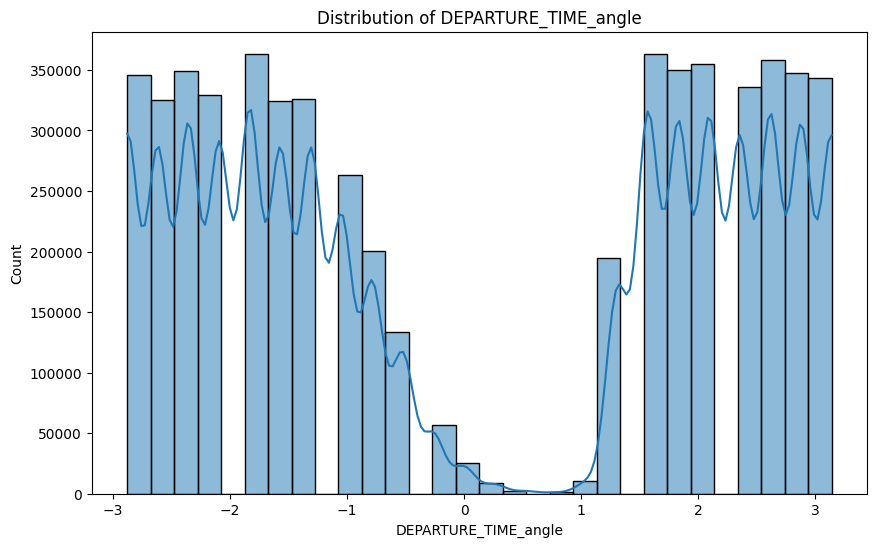

Column: DEPARTURE_TIME_angle
Number of outliers: 0
Skewness: 0.05700059742000211
Kurtosis: -1.6585765670820438
Applied MinMaxScaler to DEPARTURE_TIME_angle (Data is normally distributed)

--------------------------------------------------



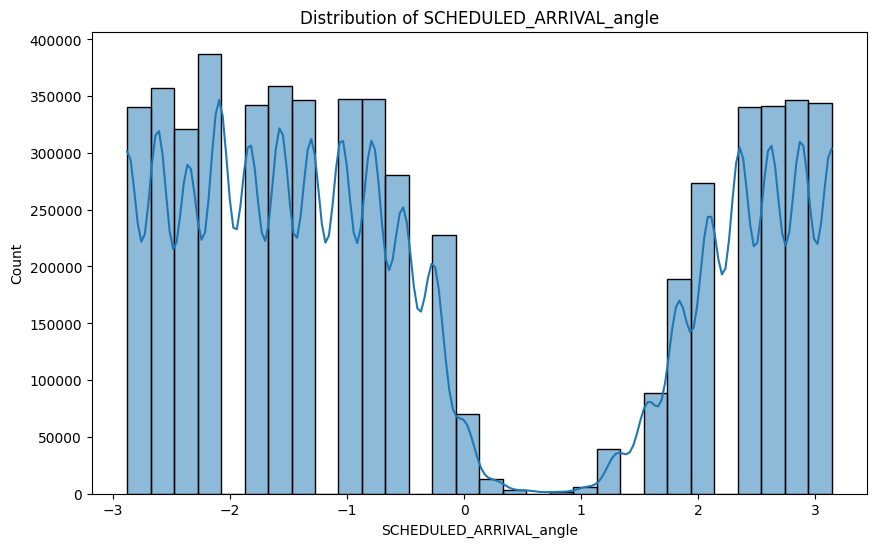

Column: SCHEDULED_ARRIVAL_angle
Number of outliers: 0
Skewness: 0.40066556462262576
Kurtosis: -1.408107863512776
Applied MinMaxScaler to SCHEDULED_ARRIVAL_angle (Data is normally distributed)

--------------------------------------------------



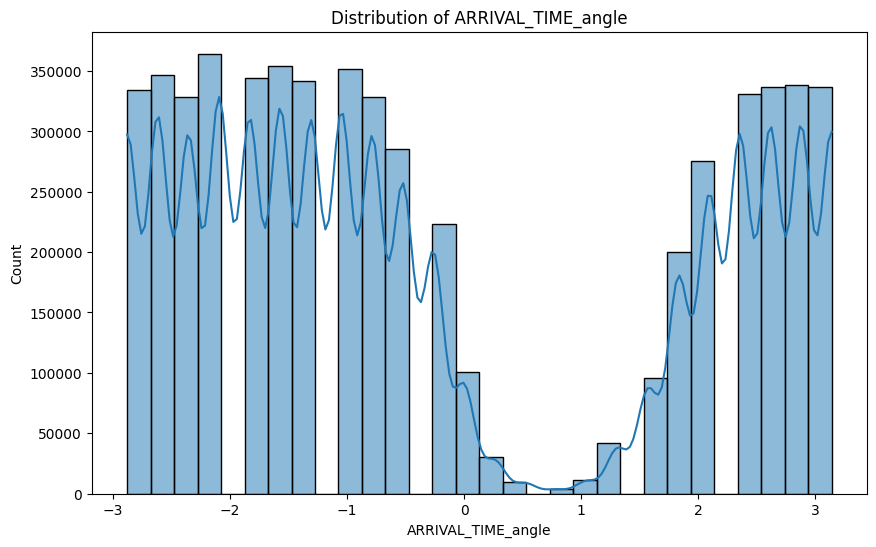

Column: ARRIVAL_TIME_angle
Number of outliers: 0
Skewness: 0.3862398222387507
Kurtosis: -1.4021997604323746
Applied MinMaxScaler to ARRIVAL_TIME_angle (Data is normally distributed)

--------------------------------------------------



In [62]:
# Example usage (assuming 'df' is your dataframe)
X = check_and_scale_numerical_columns(X)


In [63]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is the target column
# First, split your data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Apply PCA for dimensionality reduction (let's reduce it to 2 components for visualization)
pca = PCA(n_components=3)  # You can change this to 3 for 3D visualization
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 2: Print the explained variance ratio (how much variance each component explains)
print(f"Explained variance ratio for the principal components: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")

Explained variance ratio for the principal components: [0.60931075 0.14367313 0.06371668]
Total explained variance: 0.8167005574147606


In [64]:
# Combine features and target into one DataFrame
df_train = pd.DataFrame(X_train_pca)
df_train['target'] = y_train.values

# Count the number of samples in each class
count_class_0, count_class_1 = df_train['target'].value_counts()

# Separate majority and minority classes
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

# Undersample majority class (class 0)
df_class_0_under = df_class_0.sample(count_class_1, random_state=42)

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_class_0_under, df_class_1], axis=0).sample(frac=1, random_state=42)

# Split back into features and labels
X_train_pca_resampled = df_undersampled.drop('target', axis=1).values
y_train_resampled = df_undersampled['target'].values

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_pca_resampled, y_train_resampled)

# Make predictions
y_pred_rf = rf.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    940479
           1       0.92      0.99      0.96    202323

    accuracy                           0.98   1142802
   macro avg       0.96      0.99      0.97   1142802
weighted avg       0.98      0.98      0.98   1142802



In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train a simple Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca_resampled, y_train_resampled)

# Predict
y_pred_dt = dt.predict(X_test_pca)

# Evaluate
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    940479
           1       0.91      0.98      0.95    202323

    accuracy                           0.98   1142802
   macro avg       0.95      0.98      0.97   1142802
weighted avg       0.98      0.98      0.98   1142802



In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Define the model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
logreg.fit(X_train_pca_resampled, y_train_resampled)

# Make predictions
y_pred_logreg = logreg.predict(X_test_pca)

# Evaluate the model
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99    940479
           1       0.93      0.99      0.96    202323

    accuracy                           0.98   1142802
   macro avg       0.96      0.99      0.97   1142802
weighted avg       0.99      0.98      0.98   1142802



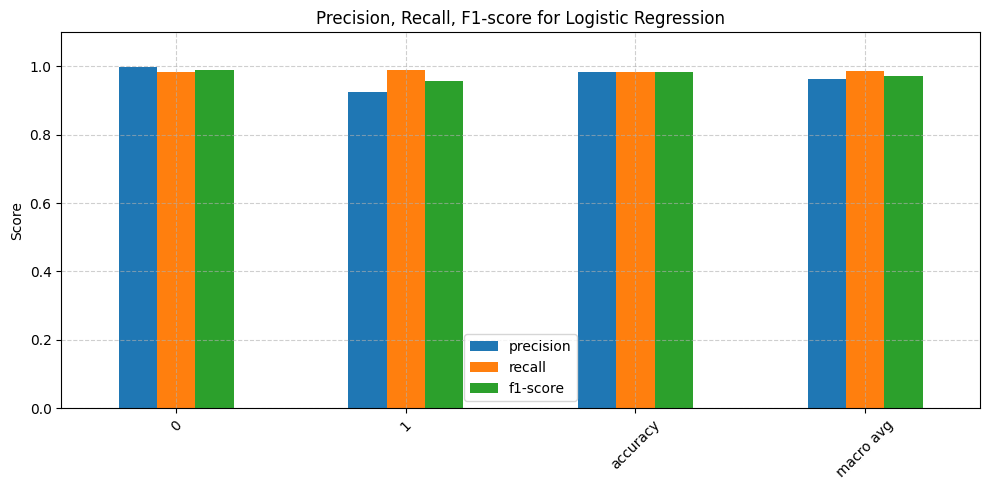

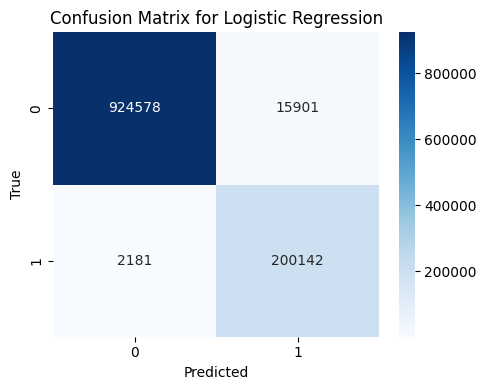

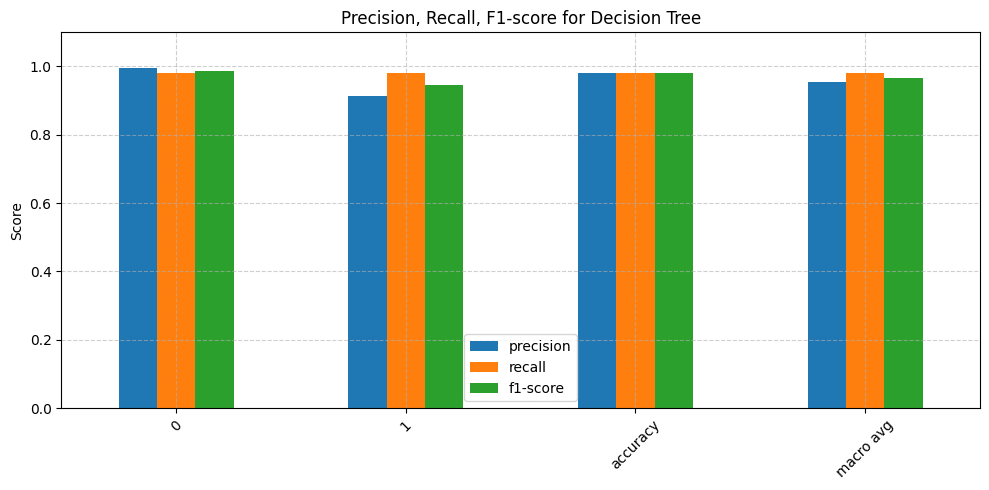

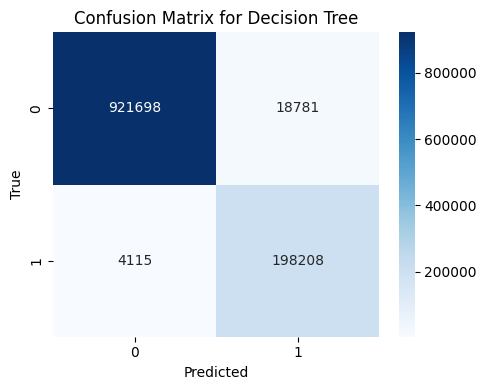

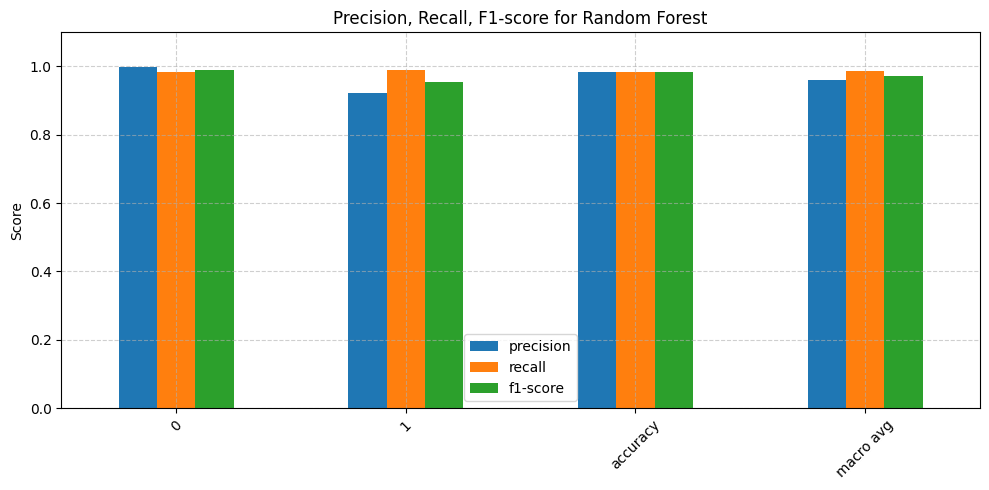

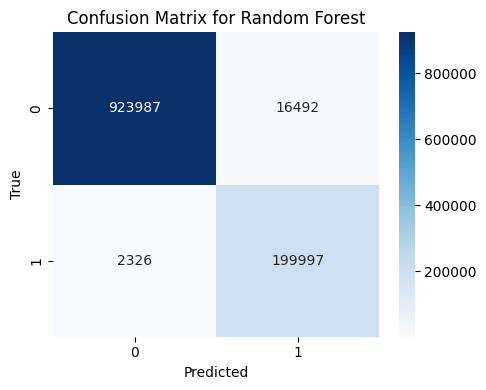

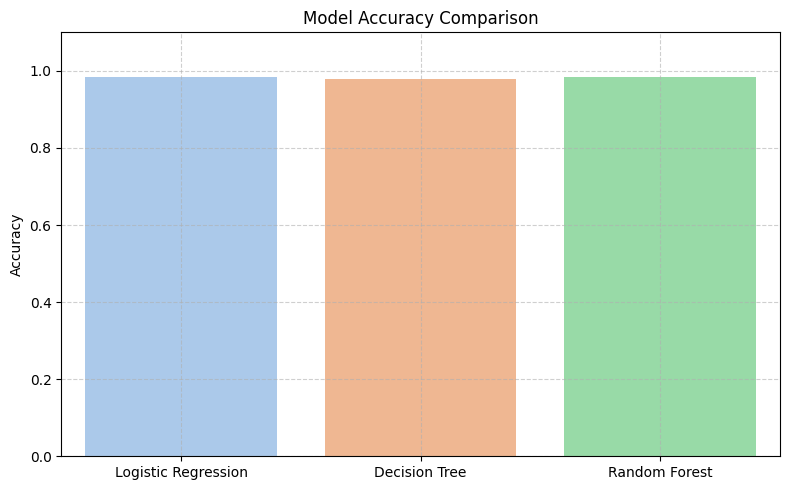

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Updated models and predictions list
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
y_preds = [y_pred_logreg, y_pred_dt, y_pred_rf]
y_tests = [y_test] * 3

# Function to plot classification report
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df.drop('accuracy', axis=1, errors='ignore', inplace=True)
    report_df.iloc[:-1, :3].plot(kind='bar', figsize=(10, 5), title=f"Precision, Recall, F1-score for {model_name}")
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.ylim(0, 1.1)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

# Visualize for each model
for model_name, y_pred in zip(models, y_preds):
    plot_classification_report(y_test, y_pred, model_name)
    plot_confusion_matrix(y_test, y_pred, model_name)

# Accuracy comparison
accuracies = [
    logreg.score(X_test_pca, y_test),
    dt.score(X_test_pca, y_test),
    rf.score(X_test_pca, y_test)
]

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='pastel')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
